In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2023-11-20 14:28:18--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2023-11-20 14:28:18 (111 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [ ]:
from helper_functions import unzip_data, create_tensorboard_callback, plot_loss_curves, compare_historys

In [ ]:
! gdown 1ddVzk0rB8QalYIg6uPt0s2_Bc-zOJR3M

Downloading...
From: https://drive.google.com/uc?id=1ddVzk0rB8QalYIg6uPt0s2_Bc-zOJR3M
To: /content/chatgpt_paraphrases.csv
100% 265M/265M [00:04<00:00, 53.8MB/s]


In [ ]:
import pandas as pd

data = pd.read_csv(r"/content/chatgpt_paraphrases.csv")

In [ ]:
data.tail()

,text,paraphrases,category,source
419192,He wants to see prices brought down across the...,['He desires a reduction in prices across all ...,sentence,cnn_news
419193,"Costs: The Department for Environment, Food an...","['The Department for Environment, Food and Rur...",sentence,cnn_news
419194,Details of the action on water bills are expec...,"[""Downing Street is expected to reveal specifi...",sentence,cnn_news
419195,Chancellor George Osborne signalled the govern...,"[""In a speech last month, Chancellor George Os...",sentence,cnn_news
419196,But Mr Miliband appeared to steal a march on t...,"['Yesterday, Mr Miliband warned that the indus...",sentence,cnn_news


In [ ]:
data['paraphrases'][0]

"['Can you provide a detailed procedure for investing in the Indian stock market?', 'What are the sequential instructions for investing in shares in India?', 'Could you outline the step-by-step process for investing in the Indian share market?', 'What is the systematic guide to investing in the Indian stock exchange?', 'Can you provide a comprehensive guide on how to invest in the Indian share market?']"

In [ ]:
def new_column_1(s):
   sentence = s.split(",")[0]
   sentence = sentence[2:-1]
   return sentence

def new_column_2(s):
   sentence = s.split(",")[1]
   sentence = sentence[2:-1]
   return sentence

def new_column_3(s):
   sentence = s.split(",")[2]
   sentence = sentence[2:-1]
   return sentence

def new_column_4(s):
   sentence = s.split(",")[3]
   sentence = sentence[2:-1]
   return sentence

def new_column_5(s):
   sentence = s.split(",")[4]
   sentence = sentence[2:-1]
   return sentence

In [ ]:
data['paraphrases_1'] = data['paraphrases'].apply(new_column_1)
data['paraphrases_2'] = data['paraphrases'].apply(new_column_2)
data['paraphrases_3'] = data['paraphrases'].apply(new_column_3)
data['paraphrases_4'] = data['paraphrases'].apply(new_column_4)
data['paraphrases_5'] = data['paraphrases'].apply(new_column_5)

In [ ]:
data.head()

,text,paraphrases,category,source,paraphrases_1,paraphrases_2,paraphrases_3,paraphrases_4,paraphrases_5
0,What is the step by step guide to invest in sh...,['Can you provide a detailed procedure for inv...,question,quora,Can you provide a detailed procedure for inves...,What are the sequential instructions for inves...,Could you outline the step-by-step process for...,What is the systematic guide to investing in t...,Can you provide a comprehensive guide on how t...
1,What is the story of Kohinoor (Koh-i-Noor) Dia...,['Can you tell me about the history of the Koh...,question,quora,Can you tell me about the history of the Kohin...,What is the tale behind the Kohinoor (Koh-i-No...,Could you narrate the story of the Kohinoor (K...,What is the account of the Kohinoor (Koh-i-Noo...,Can you describe the legend of the Kohinoor (K...
2,How can I increase the speed of my internet co...,['What are some ways to enhance my internet sp...,question,quora,What are some ways to enhance my internet spee...,Is there a method to boost my internet connect...,How can I improve the speed of my internet con...,Are there any techniques to increase my intern...,What steps can I take to speed up my internet ...
3,Why am I mentally very lonely? How can I solve...,['What is causing my mental loneliness and how...,question,quora,What is causing my mental loneliness and how c...,How can I alleviate my mental loneliness and w...,What steps can I take to address my mental lon...,Why do I feel mentally isolated and what can I...,How can I improve my mental well-being and red...
4,"Which one dissolve in water quikly sugar, salt...","['Among sugar, salt, methane, and carbon dioxi...",question,quora,Among suga,al,ethan,nd carbon dioxid,hich one dissolves rapidly in water?


In [ ]:
wiki_sentences = pd.DataFrame()
gpt_sentences = pd.DataFrame()

wiki_sentences['text'] = data['text'].iloc[0:100000]
wiki_sentences['label'] = 0

gpt_sentences['text'] = data['paraphrases_2'].iloc[0:100000]
gpt_sentences['label'] = 1

wiki_sentences.head(), gpt_sentences.head()

(                                                text  label
 0  What is the step by step guide to invest in sh...      0
 1  What is the story of Kohinoor (Koh-i-Noor) Dia...      0
 2  How can I increase the speed of my internet co...      0
 3  Why am I mentally very lonely? How can I solve...      0
 4  Which one dissolve in water quikly sugar, salt...      0,
                                                 text  label
 0  What are the sequential instructions for inves...      1
 1  What is the tale behind the Kohinoor (Koh-i-No...      1
 2  Is there a method to boost my internet connect...      1
 3  How can I alleviate my mental loneliness and w...      1
 4                                                 al      1)

## Removing Punctaution

In [ ]:
import string

def remove_puntuation(text):
  punctuationfree = "".join([i for i in text if i not in string.punctuation])
  return punctuationfree

In [ ]:
wiki_sentences['text'] = wiki_sentences['text'].apply(lambda x: remove_puntuation(x))
gpt_sentences['text'] = gpt_sentences['text'].apply(lambda x: remove_puntuation(x))

In [ ]:
print(wiki_sentences.head())
print(gpt_sentences.head())

                                                text  label
0  What is the step by step guide to invest in sh...      0
1     What is the story of Kohinoor KohiNoor Diamond      0
2  How can I increase the speed of my internet co...      0
3   Why am I mentally very lonely How can I solve it      0
4  Which one dissolve in water quikly sugar salt ...      0
                                                text  label
0  What are the sequential instructions for inves...      1
1  What is the tale behind the Kohinoor KohiNoor ...      1
2  Is there a method to boost my internet connect...      1
3  How can I alleviate my mental loneliness and w...      1
4                                                 al      1


## Converting to Lower Case

In [ ]:
wiki_sentences['text'] = wiki_sentences['text'].apply(lambda x: x.lower())
gpt_sentences['text'] = gpt_sentences['text'].apply(lambda x: x.lower())

In [ ]:
print(wiki_sentences.head())
print(gpt_sentences.head())

                                                text  label
0  what is the step by step guide to invest in sh...      0
1     what is the story of kohinoor kohinoor diamond      0
2  how can i increase the speed of my internet co...      0
3   why am i mentally very lonely how can i solve it      0
4  which one dissolve in water quikly sugar salt ...      0
                                                text  label
0  what are the sequential instructions for inves...      1
1  what is the tale behind the kohinoor kohinoor ...      1
2  is there a method to boost my internet connect...      1
3  how can i alleviate my mental loneliness and w...      1
4                                                 al      1


## Tokenization

In [ ]:
import re

def tokenization(text):
  tokens = text.split(" ")
  return tokens

wiki_sentences['text'] = wiki_sentences['text'].apply(tokenization)
gpt_sentences['text'] = gpt_sentences['text'].apply(tokenization)

In [ ]:
type(wiki_sentences['text'][0][0])

str

In [ ]:
print(wiki_sentences.head())
print(gpt_sentences.head())

                                                text  label
0  [what, is, the, step, by, step, guide, to, inv...      0
1  [what, is, the, story, of, kohinoor, kohinoor,...      0
2  [how, can, i, increase, the, speed, of, my, in...      0
3  [why, am, i, mentally, very, lonely, how, can,...      0
4  [which, one, dissolve, in, water, quikly, suga...      0
                                                text  label
0  [what, are, the, sequential, instructions, for...      1
1  [what, is, the, tale, behind, the, kohinoor, k...      1
2  [is, there, a, method, to, boost, my, internet...      1
3  [how, can, i, alleviate, my, mental, lonelines...      1
4                                               [al]      1


## Stop Words Removal

In [ ]:
import nltk

nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('english')
stopwords[0:30]
if('is' in stopwords):
  print("yes")

yes


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
def remove_stopwords(text):
  output = [i for i in text if i not in stopwords]
  return output


wiki_sentences['text'] = wiki_sentences['text'].apply(lambda x: remove_stopwords(x))
gpt_sentences['text'] = gpt_sentences['text'].apply(lambda x: remove_stopwords(x))

In [ ]:
print(wiki_sentences.head())
print(gpt_sentences.head())

                                                text  label
0  [step, step, guide, invest, share, market, india]      0
1               [story, kohinoor, kohinoor, diamond]      0
2  [increase, speed, internet, connection, using,...      0
3                          [mentally, lonely, solve]      0
4  [one, dissolve, water, quikly, sugar, salt, me...      0
                                                text  label
0  [sequential, instructions, investing, shares, ...      1
1        [tale, behind, kohinoor, kohinoor, diamond]      1
2  [method, boost, internet, connection, speed, u...      1
3       [alleviate, mental, loneliness, root, cause]      1
4                                               [al]      1


## Lemmatization

In [ ]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

wordnet_lemmatizer = WordNetLemmatizer()

def lemmatizer(text):
  lemm_text = [wordnet_lemmatizer.lemmatize(word) for word in text]
  return lemm_text

def list_to_sent(l):
  sent = " ".join(l)
  return sent

wiki_sentences['text'] = wiki_sentences['text'].apply(lambda x: lemmatizer(x))
gpt_sentences['text'] = gpt_sentences['text'].apply(lambda x: lemmatizer(x))

wiki_sentences['text'] = wiki_sentences['text'].apply(lambda x: list_to_sent(x))
gpt_sentences['text'] = gpt_sentences['text'].apply(lambda x: list_to_sent(x))

[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
dataset = pd.concat([wiki_sentences, gpt_sentences])
dataset.head()

,text,label
0,step step guide invest share market india,0
1,story kohinoor kohinoor diamond,0
2,increase speed internet connection using vpn,0
3,mentally lonely solve,0
4,one dissolve water quikly sugar salt methane c...,0


In [ ]:
dataset_shuffled = dataset.sample(frac = 1, random_state = 41)
dataset_shuffled.head()

,text,label
33730,whats difference google adwords doubleclick pu...,0
83705,happened new year’s eve celebration bangalore,0
34150,find mahavastu handbook vastushastri khushdeep...,0
97587,identify whether someone gay,1
26083,make banach tarski paradox difficult perceive,1


In [ ]:
sample = remove_puntuation(input_sentences2)
sample = sample.lower()
sample = tokenization(sample)
sample = remove_stopwords(sample)
sample = lemmatizer(sample)
sample = list_to_sent(sample)

NameError: ignored

In [ ]:
sentence = "Hi, My Name is Rohith"

In [ ]:
sample = remove_puntuation(sentence)
sample

In [ ]:
sample = sample.lower()
sample

In [ ]:
sample = tokenization(sample)

In [ ]:
sample

In [ ]:
sample = remove_stopwords(sample)
sample

In [ ]:
sample = " ".join(sample)

In [ ]:
sample

In [ ]:
sample = text_vectorizer([sample])
sample

In [ ]:
sample_embed = embedding(sample)
sample_embed

In [ ]:
sample_embed.shape

In [ ]:
sample_embed = embedding(text_vectorizer([random_sentence]))
sample_embed

In [ ]:
#dataset = pd.concat([wiki_sentences, gpt_sentences],ignore_index=True)
#dataset.head()

In [ ]:
#dataset_shuffled = dataset.sample(frac = 1, random_state = 41)
#dataset_shuffled.head()

In [ ]:
#dataset_shuffled.shape

# Split data into training and validation sets

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_sentences, test_sentences, train_labels, test_labels = train_test_split(dataset_shuffled['text'].to_numpy(),
                                                                             dataset_shuffled['label'].to_numpy(),
                                                                                              test_size = 0.3,
                                                                                              random_state = 40)

In [ ]:
train_sentences, val_sentences, train_labels, val_labels = train_test_split(train_sentences,
                                                                            train_labels,
                                                                            test_size = 0.1,
                                                                            random_state = 40)

In [ ]:
len(train_sentences), len(train_labels), len(val_sentences), len(val_labels), len(test_sentences), len(test_labels)

(126000, 126000, 14000, 14000, 60000, 60000)

In [ ]:
import numpy as np

unique, frequency = np.unique(train_labels, return_counts=True)

print('train data')
print("unique values ",unique)
print("frequency values ",frequency)

unique, frequency = np.unique(val_labels, return_counts=True)
print()
print('val data')
print("unique values ",unique)
print("frequency values ",frequency)

train data
unique values  [0 1]
frequency values  [63039 62961]

val data
unique values  [0 1]
frequency values  [6951 7049]


# Text Vectorization

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

In [ ]:
round(sum([len(i.split()) for i in train_sentences])/len(train_sentences))

6

In [ ]:
max_vocab_length = 10000
max_length = 11

In [ ]:
text_vectorizer = TextVectorization(max_tokens = max_vocab_length,
                                    output_mode = 'int',
                                    output_sequence_length = max_length)

In [ ]:
text_vectorizer.adapt(train_sentences)

In [ ]:
sample_sentence = "Artificial Intelligence (AI) has revolutionized countless aspects of our lives, from personalized recommendations on streaming platforms to self-driving cars. Its ability to analyze vast datasets and make predictions has immense potential in healthcare, finance, and more. However, concerns about data privacy, algorithmic bias, and job displacement loom large. As we harness AI's power, we must also prioritize ethical and regulatory frameworks to ensure it serves humanity's best interests, striking a delicate balance between innovation and responsibility in this ever-evolving technological landscape."
text_vectorizer([sample_sentence])

<tf.Tensor: shape=(1, 11), dtype=int64, numpy=array([[1553,  694, 2751,    1,    1,    1,    1,    1,    1,    1,    1]])>

In [ ]:
words_in_vocab = text_vectorizer.get_vocabulary()
top_5_words = words_in_vocab[:5]
bottom_5_words = words_in_vocab[-5:]
print(f"Number of words in vocab: {len(words_in_vocab)}")
print(f"Top 5 most common words: {top_5_words}")
print(f"Bottom 5 least common words: {bottom_5_words}")

Number of words in vocab: 10000
Top 5 most common words: ['', '[UNK]', 'best', 'way', 'would']
Bottom 5 least common words: ['golgi', 'gluten', 'glow', 'glock', 'glider']


# Embedding Layer

In [ ]:
from tensorflow.keras import layers

embedding = layers.Embedding(input_dim = max_vocab_length,
                             output_dim = 128,
                             input_length = max_length)

embedding

In [ ]:
import random
random_sentence = random.choice(train_sentences)

print(f"Original text:\n {random_sentence}\
        \n\nEmbedde version: ")

sample_embed = embedding(text_vectorizer([random_sentence]))
sample_embed

Original text:
 really like guy every time text doesnt answer know read text dont know doesnt reply        

Embedde version: 


<tf.Tensor: shape=(1, 11, 128), dtype=float32, numpy=
array([[[ 0.04459477, -0.02046394, -0.03996315, ...,  0.0323301 ,
         -0.03943313,  0.0447988 ],
        [ 0.01814541,  0.01131487,  0.04039432, ...,  0.0276582 ,
         -0.03599888, -0.02999642],
        [-0.03084441, -0.00685148,  0.02103919, ..., -0.04027387,
          0.04333283,  0.00710653],
        ...,
        [-0.00241988, -0.01595123,  0.03964689, ..., -0.00541437,
         -0.01871532,  0.03338954],
        [-0.02395054, -0.04142987, -0.00469756, ...,  0.02611573,
         -0.03844417, -0.03536291],
        [-0.02025051, -0.04306395,  0.00765337, ...,  0.02639234,
          0.01527581, -0.00990704]]], dtype=float32)>

# Model 0: Getting a baseline

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

model_0 = Pipeline([
    ('tfid', TfidfVectorizer()),
    ('clf', MultinomialNB())
])

model_0.fit(train_sentences, train_labels)

Pipeline(steps=[('tfid', TfidfVectorizer()), ('clf', MultinomialNB())])

In [ ]:
baseline_score = model_0.score(test_sentences, test_labels)
print(f"Our baseline model accuracy = {baseline_score*100:.2f}%")

Our baseline model accuracy = 76.44%


In [ ]:
baseline_preds = model_0.predict(test_sentences)
baseline_preds[:20]

array([1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1])

In [ ]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def calculate_results(y_true, y_pred):
  model_accuracy = accuracy_score(y_true, y_pred) * 100
  model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(y_true, y_pred, average='weighted')

  model_results = {'accuracy': model_accuracy,
                   'precision': model_precision,
                   'recall': model_recall,
                   'f1': model_f1}

  return model_results

In [ ]:
baseline_results = calculate_results(y_true = test_labels,
                                      y_pred = baseline_preds)
baseline_results

{'accuracy': 76.445,
 'precision': 0.7648741953795267,
 'recall': 0.76445,
 'f1': 0.7643533760444241}

## XGBoost

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from xgboost import XGBClassifier


tfidf_vectorizer = TfidfVectorizer(
    max_features=10000,
    stop_words='english',
    ngram_range=(1, 2),
)

xgb_classifier = XGBClassifier(
    objective='binary:logistic',
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

pipeline = Pipeline([
    ('tfidf', tfidf_vectorizer),
    ('xgb', xgb_classifier)
])


pipeline.fit(train_sentences, train_labels)
y_pred = pipeline.predict(test_sentences)

In [ ]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(test_labels, y_pred)
print(f'Accuracy: {accuracy}')


Accuracy: 0.6630833333333334


In [ ]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def calculate_results(y_true, y_pred):
  model_accuracy = accuracy_score(y_true, y_pred) * 100
  model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(y_true, y_pred, average='weighted')

  model_results = {'accuracy': model_accuracy,
                   'precision': model_precision,
                   'recall': model_recall,
                   'f1': model_f1}

  return model_results

In [ ]:
baseline_results = calculate_results(y_true = test_labels,
                                      y_pred = y_pred)
baseline_results

{'accuracy': 66.30833333333334,
 'precision': 0.7424073864370047,
 'recall': 0.6630833333333334,
 'f1': 0.6330096250541654}

## SHAP

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

alpha_value = 0.1
fit_prior_value = False
class_prior_values = [0.4, 0.6]

# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(
    max_features=10000,
    stop_words='english',
    ngram_range=(1, 2)
)

# Fit and transform the training data with the TF-IDF vectorizer
X_train_tfidf = tfidf_vectorizer.fit_transform(train_sentences)

# Fit the XGBoost classifier on the training data
NB_classifier = MultinomialNB(alpha=alpha_value, fit_prior=fit_prior_value, class_prior=class_prior_values)
NB_classifier.fit(X_train_tfidf, train_labels)

# Transform the test data with the same TF-IDF vectorizer
X_test_tfidf = tfidf_vectorizer.transform(test_sentences)

# Make predictions using the XGBoost classifier
y_pred = NB_classifier.predict(X_test_tfidf)


In [ ]:
pip install shap scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.9/532.9 kB 10.6 MB/s eta 0:00:00


In [ ]:
import shap

  0%|          | 0/1 [00:00<?, ?it/s]

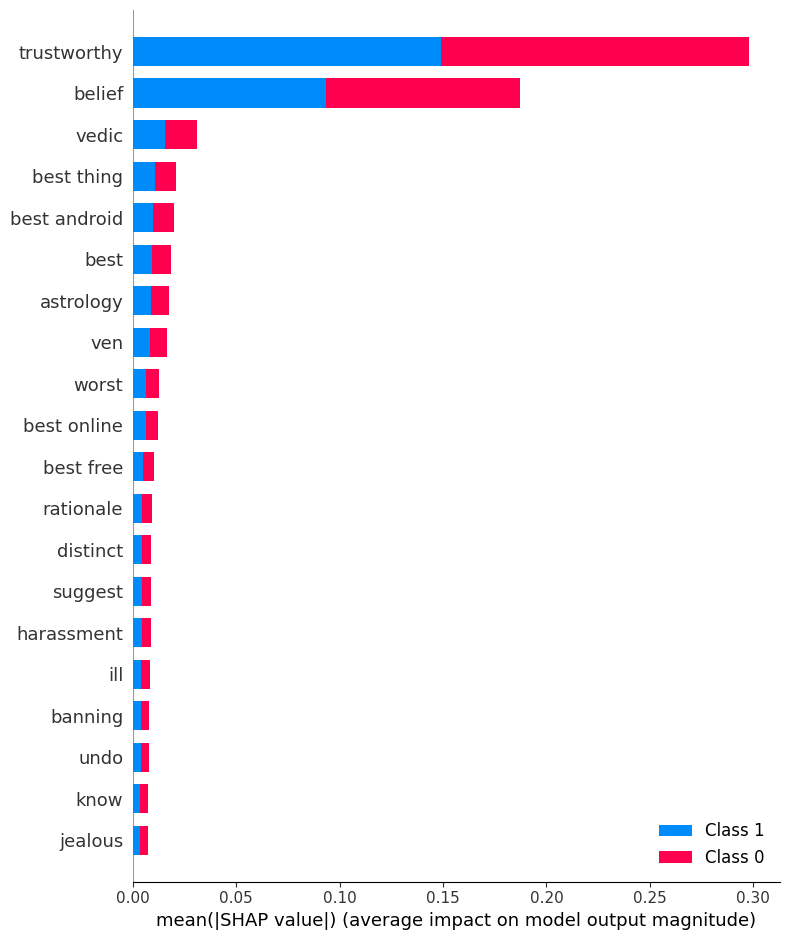

In [ ]:
#explainer = shap.Explainer(NB_classifier, X_train_tfidf)
explainer = shap.KernelExplainer(NB_classifier.predict_proba, X_train_tfidf[0:50])

# Explain predictions for a specific instance (change the index according to your dataset)
instance_idx = 0
shap_values = explainer.shap_values(X_train_tfidf[instance_idx])

# Summarize the feature importance
shap.summary_plot(shap_values, feature_names=tfidf_vectorizer.get_feature_names_out())

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from xgboost import XGBClassifier

# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(
    max_features=5000,
    stop_words='english',
    ngram_range=(1, 2)
)

# Fit and transform the training data with the TF-IDF vectorizer
X_train_tfidf = tfidf_vectorizer.fit_transform(train_sentences)

# Fit the XGBoost classifier on the training data
xgb_classifier = XGBClassifier(
    objective='binary:logistic',
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)
xgb_classifier.fit(X_train_tfidf, train_labels)

# Transform the test data with the same TF-IDF vectorizer
X_test_tfidf = tfidf_vectorizer.transform(test_sentences)

# Make predictions using the XGBoost classifier
y_pred = xgb_classifier.predict(X_test_tfidf)


In [ ]:
explainer = shap.Explainer(xgb_classifier)
shap_values = explainer(X_train_tfidf[0:100])

[23:37:43] WARNING: /workspace/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


IndexError: ignored

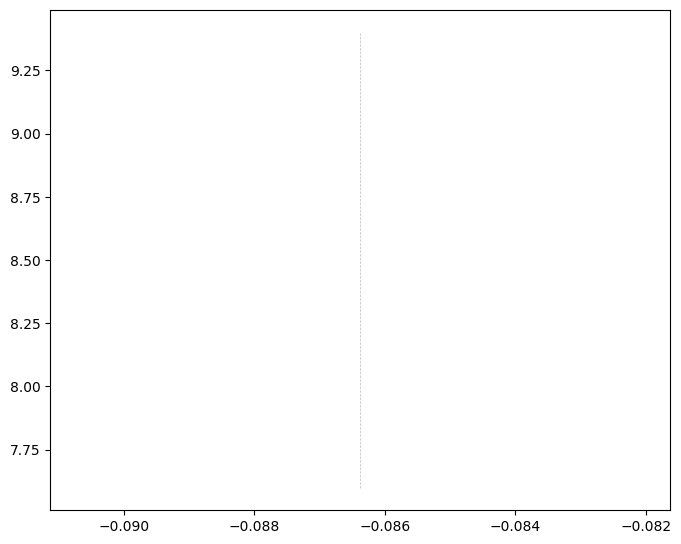

In [ ]:
shap.plots.waterfall(shap_values[0])

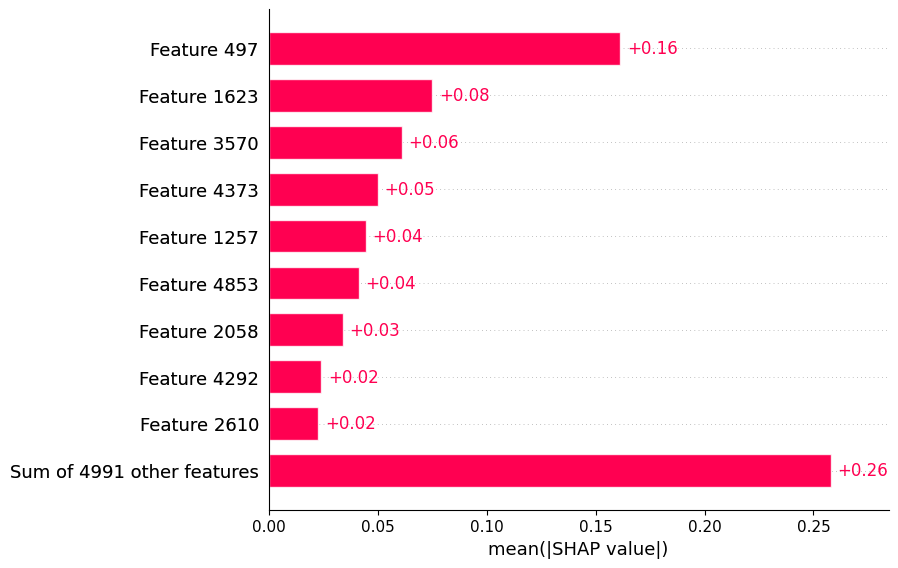

In [ ]:
shap.plots.bar(shap_values)

In [ ]:
shap.plots.force(shap_values[0:])

KeyboardInterrupt: ignored

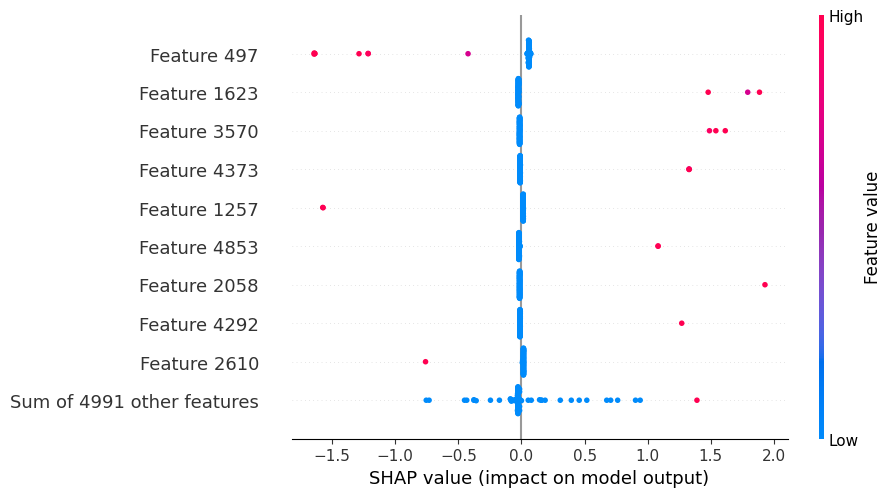

In [ ]:
shap.plots.beeswarm(shap_values)

In [ ]:
l = tfidf_vectorizer.get_feature_names_out()
print(l)

['000' '10' '10 years' ... 'zero' 'zone' 'zuckerberg']


In [ ]:
l[497], l[1623],l[3570], l[4374], l[1257], l[4853], l[2058], l[4292], l[2610]

('best',
 'explain',
 'provide',
 'suggest best',
 'difference',
 'ways',
 'hat',
 'steps',
 'like')

ValueError: ignored

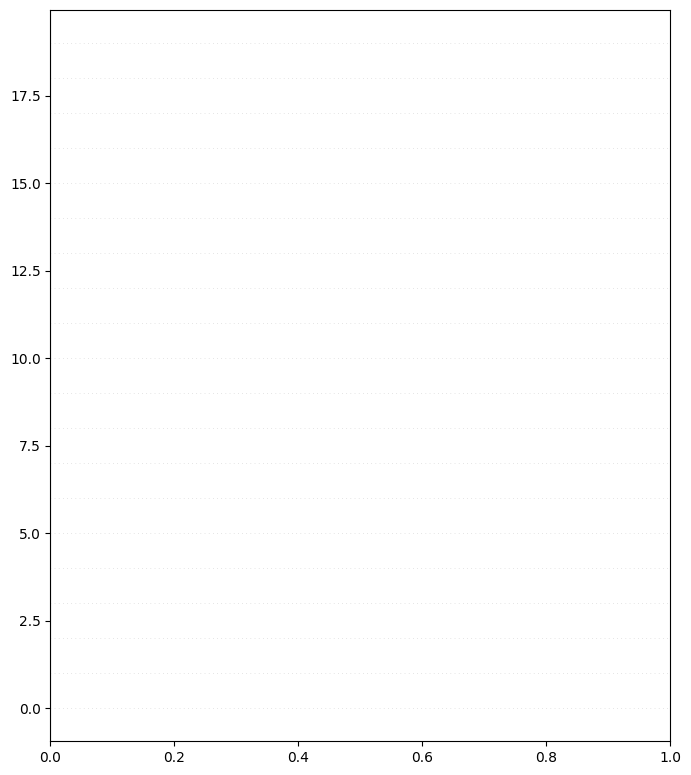

In [ ]:
shap.plots.violin(shap_values)

[23:38:05] WARNING: /workspace/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


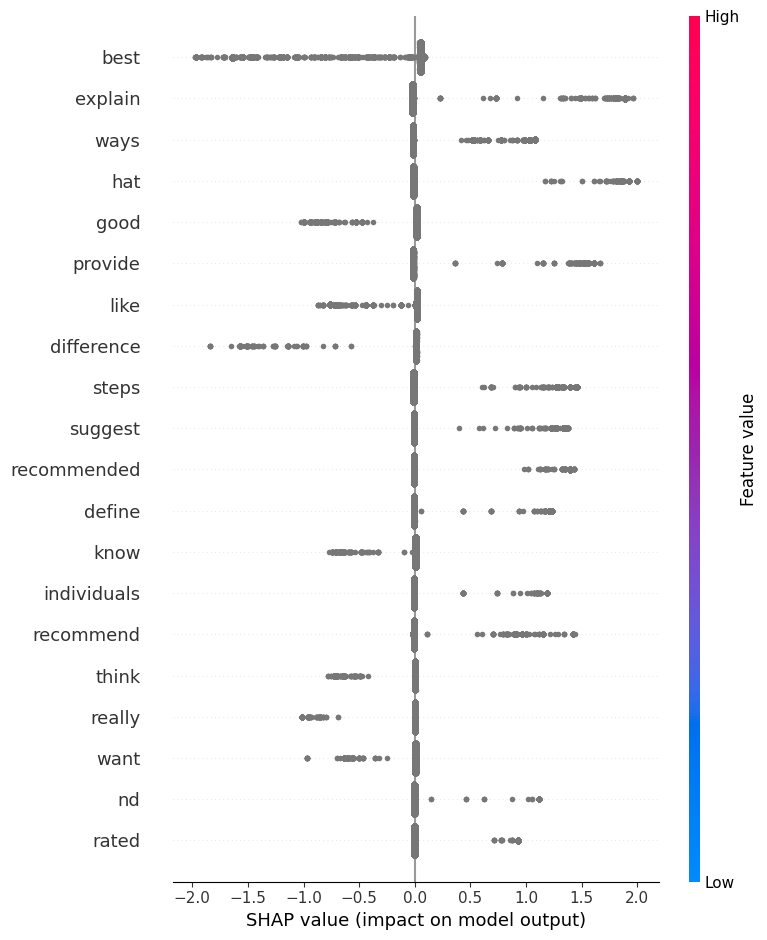

In [ ]:
explainer = shap.Explainer(xgb_classifier)

# Step 3: Compute Shapley values for the test data
shap_values = explainer.shap_values(X_train_tfidf)

# Step 4: Visualize the explanations

custom_colors = ["red", "blue"]

shap.summary_plot(shap_values, X_train_tfidf, feature_names=tfidf_vectorizer.get_feature_names_out(), color=['red'])

# Model 1: A Simple dense Model

In [ ]:
from helper_functions import create_tensorboard_callback

SAVE_DIR = 'model_logs'

In [ ]:
type(train_sentences)

numpy.ndarray

In [ ]:
from tensorflow.keras import layers

inputs = layers.Input(shape=(1,), dtype = 'string')
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.LSTM(64, return_sequences = True)(x) # when you're stacking RNN cells together set return sequences = True
x = layers.LSTM(128, return_sequences = True)(x)
x = layers.LSTM(64)(x)
outputs = layers.Dense(1, activation = 'sigmoid')(x)
model1 = tf.keras.Model(inputs, outputs, name = 'model_1_dense')

In [ ]:
model1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization (TextVe  (None, 11)                0         
 ctorization)                                                    
                                                                 
 embedding (Embedding)       (None, 11, 128)           1280000   
                                                                 
 lstm (LSTM)                 (None, 11, 64)            49408     
                                                                 
 lstm_1 (LSTM)               (None, 11, 128)           98816     
                                                                 
 lstm_2 (LSTM)               (None, 64)                49408     
                                                     

In [ ]:
model1.compile(loss = 'binary_crossentropy',
               optimizer = tf.keras.optimizers.Adam(),
               metrics = ["accuracy"])

In [ ]:
# Fit the model
model1_history = model1.fit(x = train_sentences, # input sentences can be a list of strings due to text preprocessing layer built-in model
                              y = train_labels,
                              epochs=15,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(dir_name=SAVE_DIR,
                                                                     experiment_name="simple_dense_model")])

Saving TensorBoard log files to: model_logs/simple_dense_model/20231120-162716
Epoch 1/15
3938/3938 [==============================] - 80s 18ms/step - loss: 0.4534 - accuracy: 0.7797 - val_loss: 0.4048 - val_accuracy: 0.8144
Epoch 2/15
3938/3938 [==============================] - 60s 15ms/step - loss: 0.3690 - accuracy: 0.8319 - val_loss: 0.3901 - val_accuracy: 0.8220
Epoch 3/15
3938/3938 [==============================] - 63s 16ms/step - loss: 0.3219 - accuracy: 0.8560 - val_loss: 0.3932 - val_accuracy: 0.8193
Epoch 4/15
3938/3938 [==============================] - 59s 15ms/step - loss: 0.2772 - accuracy: 0.8794 - val_loss: 0.4514 - val_accuracy: 0.8135
Epoch 5/15
3938/3938 [==============================] - 58s 15ms/step - loss: 0.2357 - accuracy: 0.9002 - val_loss: 0.4601 - val_accuracy: 0.8100
Epoch 6/15
3938/3938 [==============================] - 57s 15ms/step - loss: 0.1958 - accuracy: 0.9187 - val_loss: 0.5386 - val_accuracy: 0.8042
Epoch 7/15
3938/3938 [=======================

In [ ]:
model1.evaluate(test_sentences, test_labels)

1875/1875 [==============================] - 4s 2ms/step - loss: 0.4451 - accuracy: 0.7916


[0.44512465596199036, 0.791616678237915]

In [ ]:
model1_preds = model1.predict(test_sentences)

1875/1875 [==============================] - 3s 2ms/step


In [ ]:
model1_preds = tf.squeeze(tf.round(model1_preds))
model1_preds[:20]

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1., 0., 0., 1., 1., 0., 1.,
       0., 0., 0.], dtype=float32)>

In [ ]:
model1_results = calculate_results(y_true=test_labels,
                                    y_pred = model1_preds)

model1_results

{'accuracy': 79.16166666666666,
 'precision': 0.793658864612585,
 'recall': 0.7916166666666666,
 'f1': 0.7912478483828188}

In [ ]:
pip install shap

In [ ]:
import shap

In [ ]:
# Create a SHAP explainer
explainer = shap.DeepExplainer(model1, train_sentences[0:10])

Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.


In [ ]:
attrib_data = train_sentences[:200]
explainer = shap.DeepExplainer(model1, attrib_data)
num_explanations = 20
shap_vals = explainer.shap_values(test_sentences[:num_explanations])

AttributeError: ignored

In [ ]:
explainer = shap.DeepExplainer(model1, train_sentences[0:10])
shap_values = explainer.shap_values(train_sentences[0:10])


Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.
`tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.


AttributeError: ignored

In [ ]:
# Calculate SHAP values
shap_values = explainer.shap_values(val_sentences)

`tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.


AttributeError: ignored

In [ ]:
# Plot summary
shap.summary_plot(shap_values, train_sentences[0:10])

NameError: ignored

In [ ]:
data.head()

,text,paraphrases,category,source,paraphrases_1,paraphrases_2,paraphrases_3,paraphrases_4,paraphrases_5
0,What is the step by step guide to invest in sh...,['Can you provide a detailed procedure for inv...,question,quora,Can you provide a detailed procedure for inves...,What are the sequential instructions for inves...,Could you outline the step-by-step process for...,What is the systematic guide to investing in t...,Can you provide a comprehensive guide on how t...
1,What is the story of Kohinoor (Koh-i-Noor) Dia...,['Can you tell me about the history of the Koh...,question,quora,Can you tell me about the history of the Kohin...,What is the tale behind the Kohinoor (Koh-i-No...,Could you narrate the story of the Kohinoor (K...,What is the account of the Kohinoor (Koh-i-Noo...,Can you describe the legend of the Kohinoor (K...
2,How can I increase the speed of my internet co...,['What are some ways to enhance my internet sp...,question,quora,What are some ways to enhance my internet spee...,Is there a method to boost my internet connect...,How can I improve the speed of my internet con...,Are there any techniques to increase my intern...,What steps can I take to speed up my internet ...
3,Why am I mentally very lonely? How can I solve...,['What is causing my mental loneliness and how...,question,quora,What is causing my mental loneliness and how c...,How can I alleviate my mental loneliness and w...,What steps can I take to address my mental lon...,Why do I feel mentally isolated and what can I...,How can I improve my mental well-being and red...
4,"Which one dissolve in water quikly sugar, salt...","['Among sugar, salt, methane, and carbon dioxi...",question,quora,Among suga,al,ethan,nd carbon dioxid,hich one dissolves rapidly in water?


In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer
import tensorflow as tf
from tensorflow.keras.preprocessing import text
import shap


train_size = int(len(dataset_shuffled) * .8)

y_train = train_labels
y_test = test_labels

class TextPreprocessor(object):
    def __init__(self, vocab_size):
        self._vocab_size = vocab_size
        self._tokenizer = None
    def create_tokenizer(self, text_list):
        tokenizer = text.Tokenizer(num_words = self._vocab_size)
        tokenizer.fit_on_texts(text_list)
        self._tokenizer = tokenizer
    def transform_text(self, text_list):
        text_matrix = self._tokenizer.texts_to_matrix(text_list)
        return text_matrix

VOCAB_SIZE = 5000
train_post = train_sentences
test_post = test_sentences
processor = TextPreprocessor(VOCAB_SIZE)
processor.create_tokenizer(train_post)
X_train = processor.transform_text(train_post)
X_test = processor.transform_text(test_post)

def create_model(vocab_size, num_tags):
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Dense(50, input_shape = (VOCAB_SIZE,), activation='relu'))
    model.add(tf.keras.layers.Dense(25, activation='relu'))
    model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
    model.compile(loss = 'binary_crossentropy', optimizer='adam', metrics = ['accuracy'])
    return model
model = create_model(VOCAB_SIZE, num_tags)
model.fit(X_train, y_train, epochs = 2, batch_size=128, validation_split=0.1)
print('Eval loss/accuracy:{}'.format(model.evaluate(X_test, y_test, batch_size = 128)))

Epoch 1/2
886/886 [==============================] - 5s 4ms/step - loss: 0.4811 - accuracy: 0.7617 - val_loss: 0.4387 - val_accuracy: 0.7857
Epoch 2/2
469/469 [==============================] - 1s 3ms/step - loss: 0.4333 - accuracy: 0.7900
Eval loss/accuracy:[0.43328019976615906, 0.7899500131607056]


In [ ]:
set(test_labels)

{0, 1}

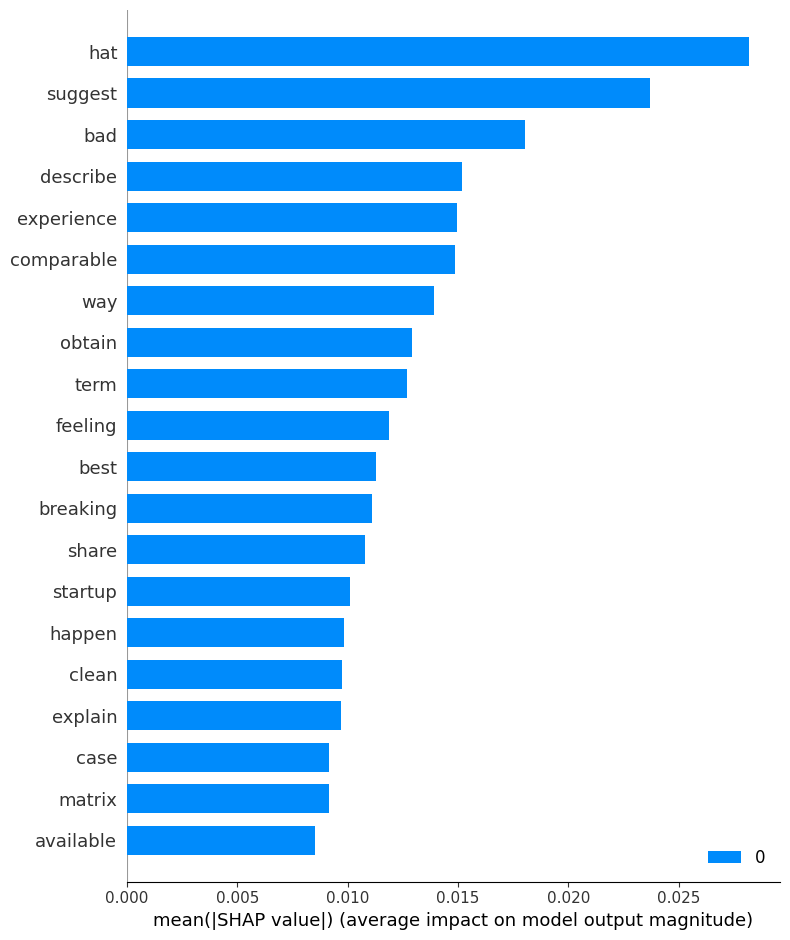

In [ ]:
attrib_data = X_train[0:500]
explainer = shap.DeepExplainer(model, attrib_data)
num_explanations = 20
shap_vals = explainer.shap_values(X_test[:num_explanations])
words = processor._tokenizer.word_index
word_lookup = list()
for i in words.keys():
  word_lookup.append(i)
word_lookup = [''] + word_lookup
shap.summary_plot(shap_vals, feature_names=word_lookup, class_names=tag_encoder.classes_)

In [ ]:
import shap

# Assuming shap_values and your feature names are already defined
# shap_values: The array of SHAP values
# feature_names: List of feature names


# Create a beeswarm plot
shap.summary_plot(shap_vals, feature_names=word_lookup, plot_type="dot")

# If you have a DataFrame, you can pass it directly:
# shap.summary_plot(shap_values, X_test_dataframe)


AssertionError: ignored

# Visualize learned Embeeddings

In [ ]:
words_in_vocal = text_vectorizer.get_vocabulary()
len(words_in_vocab), words_in_vocab[:20]

(10000,
 ['',
  '[UNK]',
  'the',
  'what',
  'is',
  'to',
  'a',
  'in',
  'of',
  'how',
  'can',
  'i',
  'are',
  'and',
  'you',
  'for',
  'do',
  'my',
  'it',
  'on'])

In [ ]:
embed_weights = model1.get_layer("embedding_1").get_weights()[0]
print(embed_weights.shape)

(10000, 128)


In [ ]:
import io
# Create output writers
out_v = io.open("embedding_vectors.tsv", "w", encoding="utf-8")
out_m = io.open("embedding_metadata.tsv", "w", encoding="utf-8")

# Write embedding vectors and words to file
for num, word in enumerate(words_in_vocab):
  if num == 0:
     continue # skip padding token
  vec = embed_weights[num]
  out_m.write(word + "\n") # write words to file
  out_v.write("\t".join([str(x) for x in vec]) + "\n") # write corresponding word vector to file
out_v.close()
out_m.close()

# Download files locally to upload to Embedding Projector
try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download("embedding_vectors.tsv")
  files.download("embedding_metadata.tsv")

# Model 2 LSTM

In [ ]:
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,), dtype = 'string')
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.LSTM(64, return_sequences = True)(x) # when you're stacking RNN cells together set return sequences = True
x = layers.LSTM(64)(x)
x = layers.Dropout(0.2)(x)
outputs = layers.Dense(1, activation = 'sigmoid')(x)
model2 = tf.keras.Model(inputs, outputs, name = 'model2_LSTM')

In [ ]:
model2.summary()

Model: "model2_LSTM"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization (TextVe  (None, 11)                0         
 ctorization)                                                    
                                                                 
 embedding (Embedding)       (None, 11, 128)           1280000   
                                                                 
 lstm_3 (LSTM)               (None, 11, 64)            49408     
                                                                 
 lstm_4 (LSTM)               (None, 64)                33024     
                                                                 
 dropout_38 (Dropout)        (None, 64)                0         
                                                       

In [ ]:
model2.compile(loss = 'binary_crossentropy',
               optimizer = tf.keras.optimizers.Adam(),
               metrics = ['accuracy'])

In [ ]:
model2_history = model2.fit(train_sentences,
                            train_labels,
                            epochs = 20,
                            validation_data = (val_sentences, val_labels),
                            callbacks = [create_tensorboard_callback(SAVE_DIR,
                                                                     "model2_LSTM")])

Saving TensorBoard log files to: model_logs/model2_LSTM/20231120-190341
Epoch 1/20
3938/3938 [==============================] - 49s 12ms/step - loss: 0.0134 - accuracy: 0.9942 - val_loss: 1.6309 - val_accuracy: 0.7878
Epoch 2/20
3938/3938 [==============================] - 46s 12ms/step - loss: 0.0135 - accuracy: 0.9942 - val_loss: 1.6002 - val_accuracy: 0.7872
Epoch 3/20
3938/3938 [==============================] - 46s 12ms/step - loss: 0.0136 - accuracy: 0.9941 - val_loss: 1.4296 - val_accuracy: 0.7858
Epoch 4/20
3938/3938 [==============================] - 48s 12ms/step - loss: 0.0133 - accuracy: 0.9940 - val_loss: 1.6484 - val_accuracy: 0.7806
Epoch 5/20
3938/3938 [==============================] - 46s 12ms/step - loss: 0.0131 - accuracy: 0.9941 - val_loss: 1.4846 - val_accuracy: 0.7850
Epoch 6/20
3938/3938 [==============================] - 48s 12ms/step - loss: 0.0129 - accuracy: 0.9942 - val_loss: 1.5227 - val_accuracy: 0.7842
Epoch 7/20
3938/3938 [==============================

In [ ]:
model2_pred_probs = model2.predict(test_sentences)
model2_pred_probs[:10]

1875/1875 [==============================] - 16s 7ms/step


array([[9.9555284e-01],
       [7.1706112e-05],
       [9.9792767e-01],
       [2.1279548e-05],
       [9.9999261e-01],
       [5.2454718e-05],
       [9.9999917e-01],
       [9.9998915e-01],
       [4.4385818e-04],
       [2.0176408e-01]], dtype=float32)

In [ ]:
model2_preds = tf.squeeze(tf.round(model2_pred_probs))
model2_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([1., 0., 1., 0., 1., 0., 1., 1., 0., 0.], dtype=float32)>

In [ ]:
model2_results = calculate_results(y_true = test_labels,
                                   y_pred = model2_preds)
model2_results

{'accuracy': 78.54333333333334,
 'precision': 0.7854513311214795,
 'recall': 0.7854333333333333,
 'f1': 0.7854295542654599}

In [ ]:
from tensorflow.keras import layers

In [ ]:
print(X.shape)
print(X[1])
X[50001]

(100000,)
1    What is the story of Kohinoor (Koh-i-Noor) Dia...
1    What is the tale behind the Kohinoor (Koh-i-No...
Name: text, dtype: object


KeyError: ignored

In [ ]:
from sklearn.model_selection import StratifiedKFold
import numpy as np

SAVE_DIR = '/content/sample_data'
num_folds = 5
batch_size = 32
num_epochs = 5
kf = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

# Initialize lists to store evaluation metrics
validation_losses = []

# Loop over K folds
X = dataset_shuffled['text']
y = dataset_shuffled['label']
for train_indices, val_indices in kf.split(X, y):  # X and y are your dataset and labels
    X_train, X_val = X[train_indices], X[val_indices]
    y_train, y_val = y[train_indices], y[val_indices]


    text_vectorizer.adapt(X_train)

    inputs = layers.Input(shape=(1,), dtype = 'string')
    x = text_vectorizer(inputs)
    x = embedding(x)
    x = layers.LSTM(64, return_sequences = True)(x) # when you're stacking RNN cells together set return sequences = True
    x = layers.LSTM(64)(x)
    outputs = layers.Dense(1, activation = 'sigmoid')(x)
    outputs = layers.Dense(1, activation = 'sigmoid')(x)
    model2 = tf.keras.Model(inputs, outputs, name = 'model2_LSTM')


    # Compile and train your model on X_train and y_train
    model2.compile(loss = 'binary_crossentropy',
               optimizer = tf.keras.optimizers.Adam(),
               metrics = ['accuracy'])
    history = history = model2.fit(X_train, y_train, batch_size=batch_size, epochs=num_epochs, validation_data=(X_val, y_val))
    # Record validation loss for this fold
    validation_losses.append(history.history['val_loss'])

# Calculate mean and standard deviation of validation losses
mean_validation_loss = np.mean(validation_losses)
std_validation_loss = np.std(validation_losses)

Epoch 1/5
2500/2500 [==============================] - 43s 14ms/step - loss: 0.4074 - accuracy: 0.8087 - val_loss: 0.3606 - val_accuracy: 0.8365
Epoch 2/5
2500/2500 [==============================] - 22s 9ms/step - loss: 0.3127 - accuracy: 0.8625 - val_loss: 0.3650 - val_accuracy: 0.8363
Epoch 3/5
2500/2500 [==============================] - 23s 9ms/step - loss: 0.2576 - accuracy: 0.8881 - val_loss: 0.3811 - val_accuracy: 0.8373
Epoch 4/5
2500/2500 [==============================] - 22s 9ms/step - loss: 0.2065 - accuracy: 0.9131 - val_loss: 0.4345 - val_accuracy: 0.8348
Epoch 5/5
2500/2500 [==============================] - 21s 9ms/step - loss: 0.1591 - accuracy: 0.9338 - val_loss: 0.5007 - val_accuracy: 0.8296
Epoch 1/5
2500/2500 [==============================] - 35s 12ms/step - loss: 0.4115 - accuracy: 0.8074 - val_loss: 0.3625 - val_accuracy: 0.8393
Epoch 2/5
2500/2500 [==============================] - 23s 9ms/step - loss: 0.3131 - accuracy: 0.8624 - val_loss: 0.3617 - val_accurac

# Model 3: GRU

In [ ]:
from tensorflow.keras import layers

inputs = layers.Input(shape=(1,), dtype = tf.string)
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.GRU(64, return_sequences = True)(x)
x = layers.LSTM(64, return_sequences = True)(x)
x = layers.GRU(64)(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(64, activation = 'relu')(x)
outputs = layers.Dense(1, activation = 'sigmoid')(x)
model3 = tf.keras.Model(inputs, outputs, name = "model3_GRU")

In [ ]:
model3.summary()

Model: "model3_GRU"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization (TextVe  (None, 11)                0         
 ctorization)                                                    
                                                                 
 embedding (Embedding)       (None, 11, 128)           1280000   
                                                                 
 gru (GRU)                   (None, 11, 64)            37248     
                                                                 
 lstm_5 (LSTM)               (None, 11, 64)            33024     
                                                                 
 gru_1 (GRU)                 (None, 64)                24960     
                                                        

In [ ]:
model3.compile(loss = 'binary_crossentropy',
               optimizer = tf.keras.optimizers.Adam(),
               metrics = ['accuracy'])

In [ ]:
model3_history = model3.fit(train_sentences,
                            train_labels,
                            epochs = 20,
                            validation_data = (val_sentences, val_labels),
                            callbacks = [create_tensorboard_callback(SAVE_DIR,
                                                                     "model3_GRU")])

Saving TensorBoard log files to: model_logs/model3_GRU/20231120-204554
Epoch 1/20
3938/3938 [==============================] - 54s 14ms/step - loss: 0.0175 - accuracy: 0.9929 - val_loss: 1.6169 - val_accuracy: 0.7856
Epoch 2/20
3938/3938 [==============================] - 54s 14ms/step - loss: 0.0180 - accuracy: 0.9928 - val_loss: 1.4539 - val_accuracy: 0.7864
Epoch 3/20
3938/3938 [==============================] - 53s 14ms/step - loss: 0.0170 - accuracy: 0.9931 - val_loss: 1.5329 - val_accuracy: 0.7834
Epoch 4/20
3938/3938 [==============================] - 52s 13ms/step - loss: 0.0184 - accuracy: 0.9924 - val_loss: 1.6297 - val_accuracy: 0.7878
Epoch 5/20
3938/3938 [==============================] - 66s 17ms/step - loss: 0.0178 - accuracy: 0.9926 - val_loss: 1.4763 - val_accuracy: 0.7833
Epoch 6/20
3938/3938 [==============================] - 67s 17ms/step - loss: 0.0175 - accuracy: 0.9930 - val_loss: 1.4498 - val_accuracy: 0.7841
Epoch 7/20
3938/3938 [==============================]

In [ ]:
model3_pred_probs = model3.predict(test_sentences)
model3_pred_probs[:10]

438/438 [==============================] - 3s 5ms/step


array([[2.8905697e-06],
       [2.4921439e-06],
       [9.9987173e-01],
       [4.0791025e-03],
       [3.6352058e-04],
       [9.9992156e-01],
       [9.8548442e-01],
       [9.9982184e-01],
       [9.9989438e-01],
       [2.9679070e-06]], dtype=float32)

In [ ]:
model3_preds = tf.squeeze(tf.round(model3_pred_probs))
model3_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 0., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>

In [ ]:
model3_results = calculate_results(y_true = test_labels,
                                   y_pred = model3_preds)
model3_results

{'accuracy': 81.96428571428571,
 'precision': 0.8197078224680167,
 'recall': 0.8196428571428571,
 'f1': 0.8196451254197181}

# Model 4 Bi Direactional RNN

In [ ]:
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,), dtype = 'string')
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.Bidirectional(layers.LSTM(64, return_sequences = True))(x)
x = layers.Bidirectional(layers.GRU(64))(x)
x = layers.Dropout(0.2)(x)
outputs = layers.Dense(1,activation = 'sigmoid')(x)
model4 = tf.keras.Model(inputs, outputs, name = "model4_BI")

In [ ]:
model4.summary()

Model: "model4_BI"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization (TextVe  (None, 11)                0         
 ctorization)                                                    
                                                                 
 embedding (Embedding)       (None, 11, 128)           1280000   
                                                                 
 bidirectional (Bidirection  (None, 11, 128)           98816     
 al)                                                             
                                                                 
 bidirectional_1 (Bidirecti  (None, 128)               74496     
 onal)                                                           
                                                         

In [ ]:
model4.compile(loss = 'binary_crossentropy',
               optimizer = tf.keras.optimizers.Adam(),
               metrics = ['accuracy'])

In [ ]:
model4_history = model4.fit(train_sentences,
                            train_labels,
                            epochs = 20,
                            validation_data = (val_sentences, val_labels),
                            callbacks = [create_tensorboard_callback(SAVE_DIR,
                                                                     "model4_Bi-directional")])

Saving TensorBoard log files to: model_logs/model4_Bi-directional/20231115-074904
Epoch 1/20
3938/3938 [==============================] - 68s 16ms/step - loss: 0.1843 - accuracy: 0.9248 - val_loss: 0.5633 - val_accuracy: 0.8249
Epoch 2/20
3938/3938 [==============================] - 55s 14ms/step - loss: 0.0877 - accuracy: 0.9663 - val_loss: 0.6833 - val_accuracy: 0.8225
Epoch 3/20
3938/3938 [==============================] - 52s 13ms/step - loss: 0.0566 - accuracy: 0.9783 - val_loss: 0.8513 - val_accuracy: 0.8311
Epoch 4/20
3938/3938 [==============================] - 52s 13ms/step - loss: 0.0419 - accuracy: 0.9842 - val_loss: 0.9806 - val_accuracy: 0.8231
Epoch 5/20
3938/3938 [==============================] - 53s 13ms/step - loss: 0.0328 - accuracy: 0.9879 - val_loss: 1.0931 - val_accuracy: 0.8238
Epoch 6/20
3938/3938 [==============================] - 52s 13ms/step - loss: 0.0283 - accuracy: 0.9894 - val_loss: 1.1135 - val_accuracy: 0.8261
Epoch 7/20
3938/3938 [====================

In [ ]:
model4_pred_probs = model4.predict(test_sentences)
model4_pred_probs[:10]

438/438 [==============================] - 3s 5ms/step


array([[1.2732554e-08],
       [3.9677474e-07],
       [9.9965596e-01],
       [9.8944306e-01],
       [3.8173575e-06],
       [9.9999905e-01],
       [1.5943927e-01],
       [9.9997580e-01],
       [9.9999952e-01],
       [4.8057097e-03]], dtype=float32)

In [ ]:
model4_preds = tf.squeeze(tf.round(model4_pred_probs))
model4_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 0., 1., 1., 0., 1., 0., 1., 1., 0.], dtype=float32)>

In [ ]:
model4_results = calculate_results(y_true = test_labels,
                                   y_pred = model4_preds)
model4_results

{'accuracy': 82.42857142857143,
 'precision': 0.8245635635688975,
 'recall': 0.8242857142857143,
 'f1': 0.8242727684231581}

# Model 5 Conv1D

In [ ]:
inputs = layers.Input(shape = (1,), dtype = tf.string)
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.Conv1D(filters = 64, kernel_size = 5, strides = 1, activation = 'relu', padding = 'valid')(x)
x = layers.GlobalAveragePooling1D()(x)
x = layers.Dropout(0.2)(x)
outputs = layers.Dense(1, activation = 'sigmoid')(x)
model5 = tf.keras.Model(inputs, outputs, name = "Model5_Conv1D")

model5.compile(loss = 'binary_crossentropy',
               optimizer = tf.keras.optimizers.Adam(),
               metrics = ['accuracy'])

model5.summary()

Model: "Model5_Conv1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization (TextVe  (None, 11)                0         
 ctorization)                                                    
                                                                 
 embedding (Embedding)       (None, 11, 128)           1280000   
                                                                 
 conv1d (Conv1D)             (None, 7, 64)             41024     
                                                                 
 global_average_pooling1d_2  (None, 64)                0         
  (GlobalAveragePooling1D)                                       
                                                                 
 dropout_5 (Dropout)         (None, 64)              

In [ ]:
model5_history = model5.fit(train_sentences,
                            train_labels,
                            epochs = 20,
                            validation_data = (val_sentences, val_labels),
                            callbacks = [create_tensorboard_callback(SAVE_DIR,
                                                                     "model4_Conv1D")])

Saving TensorBoard log files to: model_logs/model4_Conv1D/20231115-080735
Epoch 1/20
3938/3938 [==============================] - 41s 9ms/step - loss: 0.2847 - accuracy: 0.8795 - val_loss: 0.3872 - val_accuracy: 0.8429
Epoch 2/20
3938/3938 [==============================] - 29s 7ms/step - loss: 0.2223 - accuracy: 0.9097 - val_loss: 0.4038 - val_accuracy: 0.8402
Epoch 3/20
3938/3938 [==============================] - 31s 8ms/step - loss: 0.1823 - accuracy: 0.9287 - val_loss: 0.4707 - val_accuracy: 0.8416
Epoch 4/20
3938/3938 [==============================] - 30s 8ms/step - loss: 0.1526 - accuracy: 0.9413 - val_loss: 0.5008 - val_accuracy: 0.8359
Epoch 5/20
3938/3938 [==============================] - 29s 7ms/step - loss: 0.1283 - accuracy: 0.9510 - val_loss: 0.5528 - val_accuracy: 0.8320
Epoch 6/20
3938/3938 [==============================] - 29s 7ms/step - loss: 0.1078 - accuracy: 0.9596 - val_loss: 0.6653 - val_accuracy: 0.8265
Epoch 7/20
3938/3938 [==============================] - 

In [ ]:
model5_pred_probs = model5.predict(test_sentences)
model5_pred_probs[:10]

438/438 [==============================] - 1s 2ms/step


array([[1.0995135e-11],
       [1.6514415e-10],
       [1.0000000e+00],
       [1.9482105e-09],
       [1.8567947e-04],
       [1.0000000e+00],
       [5.4121870e-01],
       [9.8479545e-01],
       [9.9999988e-01],
       [2.6077749e-20]], dtype=float32)

In [ ]:
model5_preds = tf.squeeze(tf.round(model5_pred_probs))
model5_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 0., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>

In [ ]:
model5_results = calculate_results(y_true = test_labels,
                                   y_pred = model5_preds)
model5_results

{'accuracy': 81.68571428571428,
 'precision': 0.816895208707468,
 'recall': 0.8168571428571428,
 'f1': 0.8168601554118232}

# Model 6: Tensorflow Hub pretrained Sentence Encoder

In [ ]:
# Example of pretrained embedding with universal sentence encoder - https://tfhub.dev/google/universal-sentence-encoder/4
import tensorflow_hub as hub
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4") # load Universal Sentence Encoder
embed_samples = embed([sample_sentence,
                      "When you call the universal sentence encoder on a sentence, it turns it into numbers."])

print(embed_samples[0][:50])

tf.Tensor(
[-0.0646254  -0.05723967  0.02033905  0.00854339  0.03198102 -0.0549418
 -0.02973787 -0.00784132  0.04485305 -0.06055633 -0.04039752  0.02377329
  0.03573934 -0.0116493   0.03297418 -0.04821495  0.06113216 -0.04239956
  0.04982509 -0.01694498  0.06699114  0.07027017  0.01726983  0.05281517
  0.06867666  0.03043225  0.02886277  0.04559606 -0.07040984 -0.05028523
 -0.02926677  0.05089469  0.03580553  0.00964751  0.0147121  -0.02864936
 -0.069433    0.05476004  0.0146501  -0.05763233  0.02885917  0.03297281
 -0.01846486  0.0052689  -0.01674265  0.05575981  0.03301404  0.04290195
  0.06470246 -0.00251693], shape=(50,), dtype=float32)


In [ ]:
sentence_encoder_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                        input_shape=[], # shape of inputs coming to our model
                                        dtype=tf.string, # data type of inputs coming to the USE layer
                                        trainable=False, # keep the pretrained weights (we'll create a feature extractor)
                                        name="USE")

In [ ]:
model6 = tf.keras.Sequential([
    sentence_encoder_layer,
    layers.Dense(64,activation = 'relu'),
    layers.Dropout(0.2),
    layers.Dense(1, activation = 'sigmoid')
],name = 'model6_USE')

model6.compile(loss = 'binary_crossentropy',
               optimizer = tf.keras.optimizers.Adam(),
               metrics = ['accuracy'])

model6.summary()

Model: "model6_USE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_8 (Dense)             (None, 64)                32832     
                                                                 
 dropout_6 (Dropout)         (None, 64)                0         
                                                                 
 dense_9 (Dense)             (None, 1)                 65        
                                                                 
Total params: 256830721 (979.73 MB)
Trainable params: 32897 (128.50 KB)
Non-trainable params: 256797824 (979.61 MB)
_________________________________________________________________


In [ ]:
# Train a classifier on top of USE pretrained embbeddings
model6_history = model6.fit(train_sentences,
                            train_labels,
                            epochs = 20,
                            validation_data = (val_sentences, val_labels),
                            callbacks = [create_tensorboard_callback(SAVE_DIR,
                                                                     "tf_hub_sentence_endoer")])

Saving TensorBoard log files to: model_logs/tf_hub_sentence_endoer/20231115-081836
Epoch 1/20
3938/3938 [==============================] - 63s 15ms/step - loss: 0.5346 - accuracy: 0.7295 - val_loss: 0.4958 - val_accuracy: 0.7619
Epoch 2/20
3938/3938 [==============================] - 61s 16ms/step - loss: 0.4882 - accuracy: 0.7618 - val_loss: 0.4735 - val_accuracy: 0.7749
Epoch 3/20
3938/3938 [==============================] - 65s 16ms/step - loss: 0.4670 - accuracy: 0.7744 - val_loss: 0.4579 - val_accuracy: 0.7831
Epoch 4/20
3938/3938 [==============================] - 58s 15ms/step - loss: 0.4516 - accuracy: 0.7845 - val_loss: 0.4526 - val_accuracy: 0.7863
Epoch 5/20
3938/3938 [==============================] - 60s 15ms/step - loss: 0.4419 - accuracy: 0.7911 - val_loss: 0.4434 - val_accuracy: 0.7877
Epoch 6/20
3938/3938 [==============================] - 64s 16ms/step - loss: 0.4324 - accuracy: 0.7966 - val_loss: 0.4420 - val_accuracy: 0.7915
Epoch 7/20
3938/3938 [===================

In [ ]:
model6_pred_probs = model6.predict(test_sentences)
model6_pred_probs[:10]

438/438 [==============================] - 5s 11ms/step


array([[0.00944034],
       [0.00356008],
       [0.12096987],
       [0.20341152],
       [0.32307437],
       [0.97012985],
       [0.10157813],
       [0.0899617 ],
       [0.83525157],
       [0.5462405 ]], dtype=float32)

In [ ]:
model6_preds = tf.squeeze(tf.round(model6_pred_probs))
model6_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 0., 0., 0., 0., 1., 0., 0., 1., 1.], dtype=float32)>

In [ ]:
model6_results = calculate_results(y_true = test_labels,
                                   y_pred = model6_preds)
model6_results

{'accuracy': 79.42142857142858,
 'precision': 0.7942807744994467,
 'recall': 0.7942142857142858,
 'f1': 0.7941821410696417}

Paraphrase - 1

1.   dense                    - 83.5
2.   LSTM                     - 83.9
3.   GRU                      - 83
4.   Bi- LSTM                 - 82.2
5.   Conv1D                   - 82.1
6.   T-HUB pretrained encoder - 79.1


Paraphrase - 2

1.   dense                    - 83.5
2.   LSTM                     - 83.9
3.   GRU                      - 83
4.   Bi- LSTM                 - 82.2
5.   Conv1D                   - 82.1
6.   T-HUB pretrained encoder - 79.1

In [ ]:
from sklearn.model_selection import StratifiedKFold
import numpy as np

# Define your deep learning model (e.g., using Keras)
model = ...

# Define hyperparameters
learning_rate = ...
batch_size = ...
num_epochs = ...
num_folds = ...

# Create a K-fold cross-validator
kf = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

# Initialize lists to store evaluation metrics
validation_losses = []

# Loop over K folds
for train_indices, val_indices in kf.split(X, y):  # X and y are your dataset and labels
    X_train, X_val = X[train_indices], X[val_indices]
    y_train, y_val = y[train_indices], y[val_indices]

    # Compile and train your model on X_train and y_train
    model.compile(optimizer=..., loss=..., metrics=[...])
    history = model.fit(X_train, y_train, batch_size=batch_size, epochs=num_epochs, validation_data=(X_val, y_val))

    # Record validation loss for this fold
    validation_losses.append(history.history['val_loss'])

# Calculate mean and standard deviation of validation losses
mean_validation_loss = np.mean(validation_losses)
std_validation_loss = np.std(validation_losses)

# Train a final model on the entire dataset with the best hyperparameters

# Test the final model on a separate test set or for predictions


In [ ]:
import numpy as np
from sklearn.model_selection import KFold
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Lambda, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, GlobalAveragePooling2D, Lambda
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.utils import to_categorical

# Define the number of classes in your dataset
num_classes = 8

# Set the batch size for the data generator
batch_size = 32


# Define the number of folds for cross-validation
num_folds = 5

# Create K-Fold cross-validator
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Perform cross-validation
fold = 1
for train_index, val_index in kf.split(train_generator.filenames):
    print(f"Fold: {fold}")

    # Create the model for this fold
    base_model = InceptionV3(include_top=False, input_shape=(512, 512, 3))

    # Make all layers in the base model non-trainable
    for layer in base_model.layers:
        layer.trainable = False

    model = Sequential()
    model.add(Lambda(lambda x: tf.concat([x, x, x], axis=-1), input_shape=(512, 512, 1)))
    model.add(base_model)
    model.add(GlobalAveragePooling2D())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(num_classes, activation='softmax'))

    # Compile the model
    model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

    # Print the summary of the model for this fold
    model.summary()

    # Define a callback to save the best model based on validation accuracy for this fold
    checkpoint = ModelCheckpoint(f"best_model_inceptionv3_fold{fold}.h5", monitor="val_accuracy", mode="max", save_best_only=True)

    # Train the model for this fold
    epochs = 30
    train_data_gen, val_data_gen = None, None

    for epoch in range(epochs):
        print(f"Epoch: {epoch + 1}")

        # Initialize training and validation data generators for this epoch
        if train_data_gen is None:
            train_data_gen = train_generator
        else:
            train_data_gen.reset()

        if val_data_gen is None:
            val_data_gen = validation_generator
        else:
            val_data_gen.reset()

        # Train the model for this epoch using the current data generator
        model.fit(
            train_data_gen,
            epochs=1,
            validation_data=val_data_gen,
            callbacks=[checkpoint]
        )

    # Load the best saved model for this fold
    model.load_weights(f"best_model_inceptionv3_fold{fold}.h5")

    # Evaluate the model on the test set for this fold
    test_loss, test_accuracy = model.evaluate(test_generator, verbose=0)
    print(f"Test Loss (Fold {fold}):", test_loss)
    print(f"Test Accuracy (Fold {fold}):", test_accuracy)

    fold += 1

# Transformers
BERT

In [ ]:
pip install transformers

In [ ]:
from transformers import BertTokenizer, TFBertForSequenceClassification

In [ ]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased',do_lower_case = True)

tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [ ]:
max_len = 11

X_train_encoded = tokenizer.batch_encode_plus(train_sentences.tolist(),
                                              padding = True,
                                              truncation = True,
                                              max_length = max_len,
                                              return_tensors = 'tf')

X_val_encoded = tokenizer.batch_encode_plus(val_sentences.tolist(),
                                            padding = True,
                                            truncation = True,
                                            max_length = max_len,
                                            return_tensors = 'tf')

X_test_encoded = tokenizer.batch_encode_plus(test_sentences.tolist(),
                                             padding = True,
                                             truncation = True,
                                             max_length = max_len,
                                             return_tensors = 'tf')

In [ ]:
k = 0
print('Training Comments -->>',train_sentences[k])
print('\nInput Ids -->>\n',X_train_encoded['input_ids'][k])
print('\nDecoded Ids -->>\n',tokenizer.decode(X_train_encoded['input_ids'][k]))
print('\nAttention Mask -->>\n',X_train_encoded['attention_mask'][k])
print('\nLabels -->>',train_labels[k])

Training Comments -->> describe sensation falling love best friend

Input Ids -->>
 tf.Tensor([ 101 6235 8742 4634 2293 2190 2767  102    0    0    0], shape=(11,), dtype=int32)

Decoded Ids -->>
 [CLS] describe sensation falling love best friend [SEP] [PAD] [PAD] [PAD]

Attention Mask -->>
 tf.Tensor([1 1 1 1 1 1 1 1 0 0 0], shape=(11,), dtype=int32)

Labels -->> 1


In [ ]:
model = TFBertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels = 2)

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
model.summary()

Model: "tf_bert_for_sequence_classification"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bert (TFBertMainLayer)      multiple                  109482240 
                                                                 
 dropout_37 (Dropout)        multiple                  0         
                                                                 
 classifier (Dense)          multiple                  1538      
                                                                 
Total params: 109483778 (417.65 MB)
Trainable params: 109483778 (417.65 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
import tensorflow as tf

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-5)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
metric = tf.keras.metrics.SparseCategoricalAccuracy('accuracy')
model.compile(optimizer=optimizer, loss=loss, metrics=[metric])

In [ ]:
from keras.callbacks import ModelCheckpoint

In [ ]:
checkpoint_filepath2 = '/content/drive/MyDrive/chatgpt-generated-text-detection-corpus-main/dataset3/bert_model'
model_checkpoint_callback4 = ModelCheckpoint(
    filepath=checkpoint_filepath2,
    save_best_only=True,
    monitor='val_accuracy',  # Choose the metric to monitor
    mode='max',  # 'max' for accuracy, 'min' for loss, etc.
    verbose=1  # 1 for progress updates, 0 for silent
)

In [ ]:
history = model.fit(
    [X_train_encoded['input_ids'], X_train_encoded['token_type_ids'],X_train_encoded['attention_mask']],
    train_labels,
    validation_data = ([X_val_encoded['input_ids'], X_val_encoded['token_type_ids'], X_val_encoded['attention_mask']],val_labels),
    batch_size = 32,
    epochs = 15,
    callbacks=[model_checkpoint_callback4]
)

Epoch 1/15
3938/3938 [==============================] - ETA: 0s - loss: 0.4137 - accuracy: 0.8076
Epoch 1: val_accuracy improved from -inf to 0.84743, saving model to /content/drive/MyDrive/chatgpt-generated-text-detection-corpus-main/dataset3/bert_model
3938/3938 [==============================] - 478s 104ms/step - loss: 0.4137 - accuracy: 0.8076 - val_loss: 0.3535 - val_accuracy: 0.8474
Epoch 2/15
3938/3938 [==============================] - ETA: 0s - loss: 0.3184 - accuracy: 0.8621
Epoch 2: val_accuracy improved from 0.84743 to 0.85807, saving model to /content/drive/MyDrive/chatgpt-generated-text-detection-corpus-main/dataset3/bert_model
3938/3938 [==============================] - 378s 96ms/step - loss: 0.3184 - accuracy: 0.8621 - val_loss: 0.3361 - val_accuracy: 0.8581
Epoch 3/15
3938/3938 [==============================] - ETA: 0s - loss: 0.2562 - accuracy: 0.8932
Epoch 3: val_accuracy did not improve from 0.85807
3938/3938 [==============================] - 347s 88ms/step - los

In [ ]:
input_sentence = "Since the company’s inception in 2003, Tesla’s mission has been to accelerate the world’s transition to sustainable energy. The first Tesla product, the Roadster sports car, debuted in 2008, followed by the Model S sedan, which was introduced in 2012, and the Model X SUV, which launched in 2015. Model S received Consumer Reports’ Best Overall Car and has been named the Ultimate Car of the Year by Motor Trend, while Model X was the first SUV ever to earn 5-star safety ratings in every category and sub-category in the National Highway Traffic Safety Administration’s tests. In 2017, Tesla began deliveries of Model 3, a mass-market electric vehicle with more than 320 miles of range, and unveiled Tesla Semi, which is designed to save owners at least $200,000 over a million miles based on fuel costs alone. In 2019, Tesla unveiled Cybertruck, which will have better utility than a traditional truck and more performance than a sports car, as well as the Model Y compact SUV, which began customer deliveries in early 2020."
input_sentences2 = "Elon Musk is a renowned entrepreneur and business magnate, best known for his pivotal role in advancing sustainable energy and space technology. Born on June 28, 1971, in Pretoria, South Africa, Musk exhibited an early aptitude for computers and entrepreneurship. He first gained major recognition as a co-founder of PayPal, an online payment system, which eBay acquired in 2002 for $1.5 billion. Musk's ambitions, however, extended far beyond the digital payments sphere. In 2002, he founded Space Exploration Technologies Corp. (SpaceX) with the revolutionary aim of reducing space transportation costs and enabling the colonization of Mars. SpaceX achieved significant milestones, including the development of the Falcon and Starship rockets and the Dragon spacecraft, which have been fundamental in resupplying the International Space Station and advancing public-private space exploration."


inputs = tokenizer(input_sentences2, padding=True, truncation=True, max_length=max_len, return_tensors="tf")


In [ ]:
sample = remove_puntuation(input_sentences2)
sample = sample.lower()
sample = tokenization(sample)
sample = remove_stopwords(sample)
sample = lemmatizer(sample)
sample = list_to_sent(sample)


In [ ]:
inputs = tokenizer(sample, padding=True, truncation=True, max_length=max_len, return_tensors="tf")


In [ ]:
import tensorflow as tf

predictions = model(inputs['input_ids'], token_type_ids=inputs['token_type_ids'], attention_mask=inputs['attention_mask'])
predicted_class = tf.argmax(predictions.logits, axis=1).numpy()[0]


In [ ]:
print("Predicted class:", predicted_class)


1875/1875 [==============================] - 23s 11ms/step


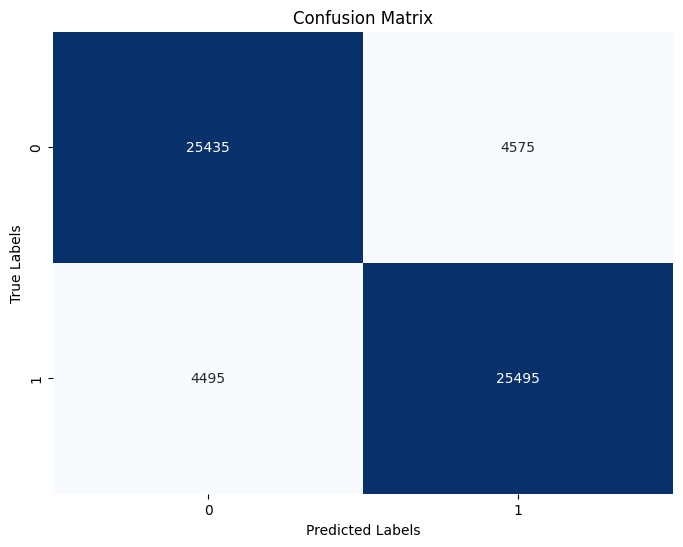

              precision    recall  f1-score   support

           0       0.85      0.85      0.85     30010
           1       0.85      0.85      0.85     29990

    accuracy                           0.85     60000
   macro avg       0.85      0.85      0.85     60000
weighted avg       0.85      0.85      0.85     60000



In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Assume your model is named `model` and is already trained.
# Assume `X_test_encoded` is your encoded test data and `test_labels` are the true labels.

# Making predictions on the test data
predictions = model.predict([X_test_encoded['input_ids'], X_test_encoded['token_type_ids'], X_test_encoded['attention_mask']])
# Convert predictions to label indices
predicted_labels = np.argmax(predictions.logits, axis=1)

# Generating the confusion matrix
conf_matrix = confusion_matrix(test_labels, predicted_labels)

# Plotting the confusion matrix
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', ax=ax, cmap='Blues', cbar=False)
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
ax.set_title('Confusion Matrix')
plt.show()

# Printing the classification report
print(classification_report(test_labels, predicted_labels))


In [ ]:
from transformers import BertTokenizer, TFBertForSequenceClassification

load_directory = '/content/drive/MyDrive/chatgpt-generated-text-detection-corpus-main/ppt'
model = TFBertForSequenceClassification.from_pretrained(load_directory)
tokenizer = BertTokenizer.from_pretrained(load_directory)


In [ ]:
input_sentence = "The United States of America (USA), commonly known as the United States (U.S.) or America, is a country primarily located in North America. It consists of 50 states, a federal district, five major self-governing territories, and various possessions. With over 328 million people, the U.S. is the third-most populous country in the world. The capital is Washington, D.C., and the most populous city is New York City. Spanning over 9.8 million square kilometers, the USA is the world's third- or fourth-largest country by total area. The geography and climate of the U.S. are highly diverse, with environments ranging from arctic to tropical. Its economy is the world's largest by nominal GDP and net wealth and is fueled by abundant natural resources, a well-developed infrastructure, and high productivity."
input_sentences2 = "Spanning over 9.8 million square kilometers, the USA is the world's third- or fourth-largest country by total area. The geography and climate of the U.S. are highly diverse, with environments ranging from arctic to tropical. Its economy is the world's largest by nominal GDP and net wealth and is fueled by abundant natural resources, a well-developed infrastructure, and high productivity. Established by thirteen British colonies on the East Coast in the late 18th century, the U.S. began its expansion westward across North America throughout the 19th century, gradually acquiring new territories, displacing Native American tribes, and admitting new states. The American Civil War ended legal slavery in the country. The United States emerged as a global power in the 20th century. It was a founding member of the United Nations, World Bank, International Monetary Fund, Organization of American States, NATO, and other international organizations. It is a permanent member of the United Nations Security Council. Known for its cultural and political influence, the U.S. plays a prominent role in global affairs."


inputs = tokenizer(input_sentences2, padding=True, truncation=True, max_length=max_len, return_tensors="tf")


In [ ]:
sample = remove_puntuation(input_sentences2)
sample = sample.lower()
sample = tokenization(sample)
sample = remove_stopwords(sample)
sample = lemmatizer(sample)
sample = list_to_sent(sample)

inputs = tokenizer(input_sentences2, padding=True, truncation=True, max_length=max_len, return_tensors="tf")

In [ ]:
import tensorflow as tf

predictions = model(inputs['input_ids'], token_type_ids=inputs['token_type_ids'], attention_mask=inputs['attention_mask'])
predicted_class = tf.argmax(predictions.logits, axis=1).numpy()[0]


In [ ]:
print("Predicted class:", predicted_class)

## RoBERTa

In [ ]:
from sklearn.metrics import accuracy_score

import numpy as np

In [ ]:
pip install tokenizers

In [ ]:
pip install transformers

In [ ]:
import tensorflow as tf
import tensorflow.keras.backend as K
import tokenizers

from transformers import RobertaTokenizer, TFRobertaModel

from collections import Counter

import warnings
warnings.filterwarnings("ignore")

In [ ]:
MAX_LEN = 256

In [ ]:
def roberta_encode(texts, tokenizer):
  ct = len(texts)
  input_ids = np.ones((ct, MAX_LEN), dtype = 'int32')
  attention_mask = np.zeros((ct, MAX_LEN), dtype = 'int32')
  token_type_ids = np.zeros((ct,MAX_LEN), dtype = 'int32')

  for k, text in enumerate(texts):
    tok_text = tokenizer.tokenize(text)

    enc_text = tokenizer.convert_tokens_to_ids(tok_text[:(MAX_LEN-2)])

    input_length = len(enc_text) + 2
    input_length = input_length if input_length < MAX_LEN else MAX_LEN

    # Add tokens [CLS] and [SEP] at the beginning and the end
    input_ids[k,:input_length] = np.asarray([0] + enc_text + [2], dtype='int32')

    # Set to 1s in the attention input
    attention_mask[k,:input_length] = 1

    return {
        'input_word_ids': input_ids,
        'input_mask': attention_mask,
        'input_type_ids': token_type_ids
    }

In [ ]:
tokenizer = RobertaTokenizer.from_pretrained('roberta-base')

In [ ]:
checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath='/content/RoBERTa/best_model1.h5',
                             monitor='val_accuracy',
                             mode='max',
                             save_best_only=True)

In [ ]:
train_sentences = roberta_encode(train_sentences, tokenizer)
val_sentences = roberta_encode(val_sentences, tokenizer)

In [ ]:
train_labels = np.asarray(train_labels, dtype = 'int32')
val_labels = np.asarray(val_labels, dtype = 'int32')

In [ ]:
def build_model(num_classes = 2):
      input_word_ids = tf.keras.Input(shape=(MAX_LEN,), dtype=tf.int32, name='input_word_ids')
      input_mask = tf.keras.Input(shape=(MAX_LEN,), dtype=tf.int32, name='input_mask')
      input_type_ids = tf.keras.Input(shape=(MAX_LEN,), dtype=tf.int32, name='input_type_ids')

      # Import RoBERTa model from HuggingFace
      roberta_model = TFRobertaModel.from_pretrained('roberta-base')
      x = roberta_model(input_word_ids, attention_mask=input_mask, token_type_ids=input_type_ids)

      # Huggingface transformers have multiple outputs, embeddings are the first one,
      # so let's slice out the first position
      x = x[0]

      x = tf.keras.layers.Dropout(0.1)(x)
      x = tf.keras.layers.Flatten()(x)
      x = tf.keras.layers.Dense(256, activation='relu')(x)
      x = tf.keras.layers.Dense(num_classes, activation='softmax')(x)

      model = tf.keras.Model(inputs=[input_word_ids, input_mask, input_type_ids], outputs=x)
      model.compile(
          optimizer=tf.keras.optimizers.Adam(lr=1e-5),
          loss='sparse_categorical_crossentropy',
          metrics=['accuracy'])

      return model

In [ ]:
model = build_model(num_classes = 2)
model.summary()

In [ ]:
history = model.fit(train_sentences,
                        train_labels,
                        epochs=15,
                        batch_size=32,
                        verbose=1,
                        callbacks = [checkpoint],
                        validation_data=(val_sentences, val_labels))

Epoch 1/15


1969/1969 [==============================] - 1180s 575ms/step - loss: 0.8240 - accuracy: 0.4966 - val_loss: 0.6931 - val_accuracy: 0.5059
Epoch 2/15
 921/1969 [=============>................] - ETA: 9:31 - loss: 0.6932 - accuracy: 0.5030

# BERT NEW

In [ ]:
pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 20.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 43.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 31.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 32.5 MB/s eta 0:00:00


In [ ]:
from transformers import BertTokenizer, TFBertForSequenceClassification

In [ ]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased',do_lower_case = True)

In [ ]:
max_len = 184

X_train_encoded = tokenizer.batch_encode_plus(train_sentences.tolist(),
                                              padding = True,
                                              truncation = True,
                                              max_length = max_len,
                                              return_tensors = 'tf')

X_val_encoded = tokenizer.batch_encode_plus(val_sentences.tolist(),
                                            padding = True,
                                            truncation = True,
                                            max_length = max_len,
                                            return_tensors = 'tf')

X_test_encoded = tokenizer.batch_encode_plus(test_sentences.tolist(),
                                             padding = True,
                                             truncation = True,
                                             max_length = max_len,
                                             return_tensors = 'tf')

In [ ]:
k = 0
print('Training Comments -->>',train_sentences[k])
print('\nInput Ids -->>\n',X_train_encoded['input_ids'][k])
print('\nDecoded Ids -->>\n',tokenizer.decode(X_train_encoded['input_ids'][k]))
print('\nAttention Mask -->>\n',X_train_encoded['attention_mask'][k])
print('\nLabels -->>',train_labels[k])

Training Comments -->> Is it feasible to locate a silenced(app) phone number?

Input Ids -->>
 tf.Tensor([  101  2003  2009 22945  2000 12453  1037 25030  1006 10439   102], shape=(11,), dtype=int32)

Decoded Ids -->>
 [CLS] is it feasible to locate a silenced ( app [SEP]

Attention Mask -->>
 tf.Tensor([1 1 1 1 1 1 1 1 1 1 1], shape=(11,), dtype=int32)

Labels -->> 1


In [ ]:
model = TFBertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels = 2)

All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
model.summary()

Model: "tf_bert_for_sequence_classification"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bert (TFBertMainLayer)      multiple                  109482240 
                                                                 
 dropout_74 (Dropout)        multiple                  0         
                                                                 
 classifier (Dense)          multiple                  1538      
                                                                 
Total params: 109483778 (417.65 MB)
Trainable params: 109483778 (417.65 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
import tensorflow as tf

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=2e-5)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
metric = tf.keras.metrics.SparseCategoricalAccuracy('accuracy')
model.compile(optimizer=optimizer, loss=loss, metrics=["accuracy"])

In [ ]:
checkpoint_filepath4 = '/content/drive/MyDrive/chatgpt-generated-text-detection-corpus-main/dataset3/final_model'
model_checkpoint_callback4 = ModelCheckpoint(
    filepath=checkpoint_filepath2,
    save_best_only=True,
    monitor='val_accuracy',  # Choose the metric to monitor
    mode='max',  # 'max' for accuracy, 'min' for loss, etc.
    verbose=1  # 1 for progress updates, 0 for silent
)

In [ ]:
history = model.fit(
    [X_train_encoded['input_ids'], X_train_encoded['token_type_ids'],X_train_encoded['attention_mask']],
    train_labels,
    validation_data = ([X_val_encoded['input_ids'], X_val_encoded['token_type_ids'], X_val_encoded['attention_mask']],val_labels),
    batch_size = 32,
    epochs = 10,
    callbacks=[model_checkpoint_callback4]
)

Epoch 1/5
1969/1969 [==============================] - 247s 100ms/step - loss: 0.3479 - accuracy: 0.8421 - val_loss: 0.3129 - val_accuracy: 0.8620
Epoch 2/5
1969/1969 [==============================] - 187s 95ms/step - loss: 0.2396 - accuracy: 0.8987 - val_loss: 0.2776 - val_accuracy: 0.8816
Epoch 3/5
1969/1969 [==============================] - 185s 94ms/step - loss: 0.1655 - accuracy: 0.9334 - val_loss: 0.2946 - val_accuracy: 0.8829
Epoch 4/5
1969/1969 [==============================] - 185s 94ms/step - loss: 0.1061 - accuracy: 0.9593 - val_loss: 0.3894 - val_accuracy: 0.8736
Epoch 5/5
1969/1969 [==============================] - 185s 94ms/step - loss: 0.0699 - accuracy: 0.9748 - val_loss: 0.4699 - val_accuracy: 0.8646


In [ ]:
pip install tensorflow_text

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 52.7 MB/s eta 0:00:00


In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text

In [ ]:
bert_preprocess = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
bert_encoder = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4")

In [ ]:
def get_sentence_embeding(sentences):
    preprocessed_text = bert_preprocess(sentences)
    return bert_encoder(preprocessed_text, training = False)['pooled_output']

get_sentence_embeding([
    "500$ discount. hurry up",
    "Bhavin, are you up for a volleybal game tomorrow?"]
)

InvalidArgumentError: ignored

In [ ]:
# Bert layers
text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
preprocessed_text = bert_preprocess(text_input)
outputs = bert_encoder(preprocessed_text)

# Neural network layers
l = tf.keras.layers.Dropout(0.2, name="dropout")(outputs['pooled_output'])
l = tf.keras.layers.Dense(1, activation='sigmoid', name="output")(l)

# Use inputs and outputs to construct a final model
model = tf.keras.Model(inputs=[text_input], outputs = [l])

In [ ]:
from keras.callbacks import ModelCheckpoint

In [ ]:
checkpoint_filepath2 = '/content/drive/MyDrive/chatgpt-generated-text-detection-corpus-main/pretrained_bert3'
model_checkpoint_callback2 = ModelCheckpoint(
    filepath=checkpoint_filepath2,
    save_best_only=True,
    monitor='val_accuracy',  # Choose the metric to monitor
    mode='max',  # 'max' for accuracy, 'min' for loss, etc.
    verbose=1  # 1 for progress updates, 0 for silent
)

In [ ]:
METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall')
]

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=METRICS)

In [ ]:
model.fit(train_sentences, train_labels, epochs=10, validation_data = (val_sentences,val_labels),
    batch_size = 32,
    callbacks=[model_checkpoint_callback2])

Epoch 1/10
2396/3938 [=================>............] - ETA: 4:05 - loss: 0.6134 - accuracy: 0.6544 - precision: 0.6597 - recall: 0.6424

In [ ]:
pip install tensorflow_hub

In [ ]:
pip install tensorflow_text

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 18.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 88.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 51.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 88.8 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.14.0
    Uninstalling tensorflow-estimator-2.14.0:
      Successfully uninstalled tensorflow-estimator-2.14.0
  Attempting uninstall: keras
    Found existing installation: keras 2.14.0
    Uninstalling keras-2.14.0:
      Successfully uninstalled keras-2.14.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.14.1
    Uninstalling tensorboard-2.14.1:
      Successfully uninstalled tensorboard-2.14.1
  Attempting uninstall: tensorflow
    Found existing install

In [ ]:
import tensorflow_hub as hub

In [ ]:
import tensorflow as tf
import tensorflow_text as text

In [ ]:
bert_preprocess = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
bert_encoder = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4")

In [ ]:
def get_sentence_embeding(sentences):
    preprocessed_text = bert_preprocess(sentences)
    return bert_encoder(preprocessed_text, training = False)['pooled_output']

get_sentence_embeding([
    "500$ discount. hurry up",
    "Bhavin, are you up for a volleybal game tomorrow?"]
)

InvalidArgumentError: ignored

In [ ]:
# Bert layers
text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
preprocessed_text = bert_preprocess(text_input)
outputs = bert_encoder(preprocessed_text)

# Neural network layers
l = tf.keras.layers.Dropout(0.2, name="dropout")(outputs['pooled_output'])
l = tf.keras.layers.Dense(1, activation='sigmoid', name="output")(l)

# Use inputs and outputs to construct a final model
model = tf.keras.Model(inputs=[text_input], outputs = [l])

In [ ]:
from keras.callbacks import ModelCheckpoint

In [ ]:
METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall')
]

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=METRICS)

In [ ]:
model.fit(train_sentences, train_labels, epochs=15, validation_data = (val_sentences,val_labels),
    batch_size = 32)

Epoch 1/15


InvalidArgumentError: ignored

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
conf_matrix = confusion_matrix(test_labels, y_predicted)

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Optionally, print a classification report
print("\nClassification Report:")
print(classification_report(test_labels, y_predicted))